In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# Define the matrices and initial parameters

# Input
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
# Output
D = np.array([1, 0, 0, 1])
# Generate 3 random sample weights
W = 2 * np.random.rand(1, 3) - 1

print(W)

[[-0.38756684 -0.21397151 -0.68887721]]


[[0 1 1]
 [1 0 1]]


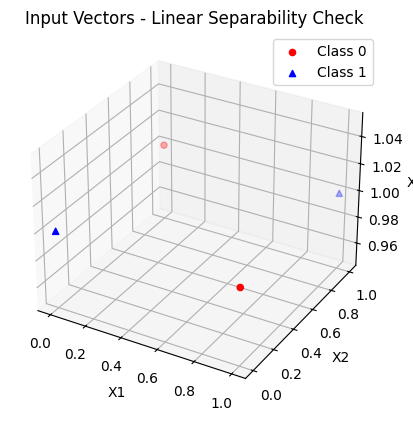

In [71]:
# Separate the data based on output class
class_0 = X[D == 0]
class_1 = X[D == 1]
print(class_0)
# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class_0[:, 0], class_0[:, 1], class_0[:, 2], c='r', marker='o', label='Class 0')
ax.scatter(class_1[:, 0], class_1[:, 1], class_1[:, 2], c='b', marker='^', label='Class 1')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.title('Input Vectors - Linear Separability Check')
plt.legend()
plt.show()

In [72]:
#W = np.array([0.3897, -0.3658, 0.9004])
alpha = 0.9
mse = []

# Get the size of X
size_of_X = X.shape[0]

# Store the weights in a list for plotting
weights = []
weights.append(W)

# Training loop
for epoch in range(500):
    total_error = 0
    for value in range(size_of_X):
        x = X[value, :].reshape(-1, 1)    # input features of current sample - converts row of an input matrix to column vector
        d = D[value]                      # desired output for current sample
        weighted_sum = np.dot(W, x)
        sigmoid_func = 1 / (1 + np.exp(-weighted_sum))
        error = d - sigmoid_func
        delta = sigmoid_func * (1 - sigmoid_func) * error
        dW = alpha * delta * x.T  # delta rule
        W += dW
        total_error += error**2
    weights.append(W)
    mse.append(total_error / size_of_X)

#print(mse)
mse = np.array(mse).flatten()  # Flatten the mse list
#print(mse)

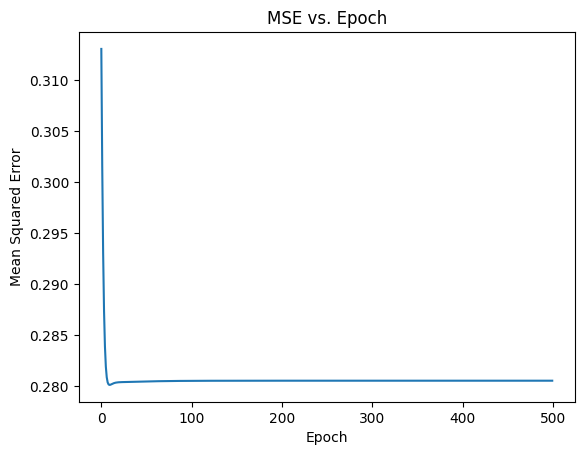

In [73]:
plt.plot(range(500), mse)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch')
plt.show()